<a href="https://colab.research.google.com/github/srijj/Bike_Sharing_Demand/blob/main/Bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

# **Read Data**

In [ ]:
df=pd.read_csv("/content/day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# **Understanding the data**

In [ ]:
df.shape

(730, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#Check the descriptive  statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# **Data Quality Check**

In [ ]:
#Print null counts by column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
#checking for null rows 
df.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
725    0
726    0
727    0
728    0
729    0
Length: 730, dtype: int64

In [ ]:
#check for duplicates
df.duplicated().sum()

0

# **Data Cleaning**

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Droping instant column as it is an index column which has nothing to do with target

df.drop("instant",axis=1,inplace=True)

In [ ]:
#Year, Month and Date can be extracted from 'dteday'. After that 'dteday' column can be dropped.
# But we already have year as 'yr' and month as 'mnth' , all we need is date 

df["date"] = pd.DatetimeIndex(df["dteday"]).day


In [ ]:
#dropping redundant columns 
df.drop(["dteday"],axis=1,inplace=True)

In [ ]:
#Inspect data frame after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


In [ ]:
df["yr"].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [ ]:
df["weekday"].value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [ ]:
df["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [ ]:
df["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [ ]:
#Converting weekday ,weathersit, season and  to categorical types

df["weekday"].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"},inplace=True)

df["weathersit"].replace({1:"Clear/Party Clear", 2:"Mist and Cloudy", 3:"Light Snow/Rain",4:"Heavy Snow/Rain"},inplace=True)

df["season"].replace({1:"spring", 2:"summer", 3:"fall",4:"winter"},inplace=True)

df["mnth"].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace=True)

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date
0,spring,0,jan,0,Saturday,0,Mist and Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,spring,0,jan,0,Sunday,0,Mist and Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,spring,0,jan,0,Monday,1,Clear/Party Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1
3,spring,0,jan,0,Tuesday,1,Clear/Party Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1
4,spring,0,jan,0,Wednesday,1,Clear/Party Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1


# **Visualizing Categorical Variables**

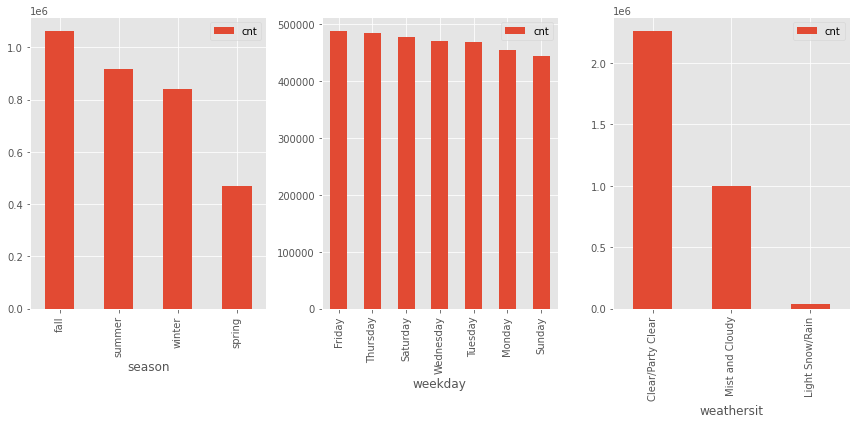

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(12,6))

df.groupby('season').sum().sort_values('cnt', ascending=False)[["cnt"]].plot.bar(ax=ax1)
df.groupby('weekday').sum().sort_values('cnt', ascending=False)[["cnt"]].plot.bar(ax=ax2)
df.groupby('weathersit').sum().sort_values('cnt', ascending=False)[["cnt"]].plot.bar(ax=ax3)

plt.tight_layout()

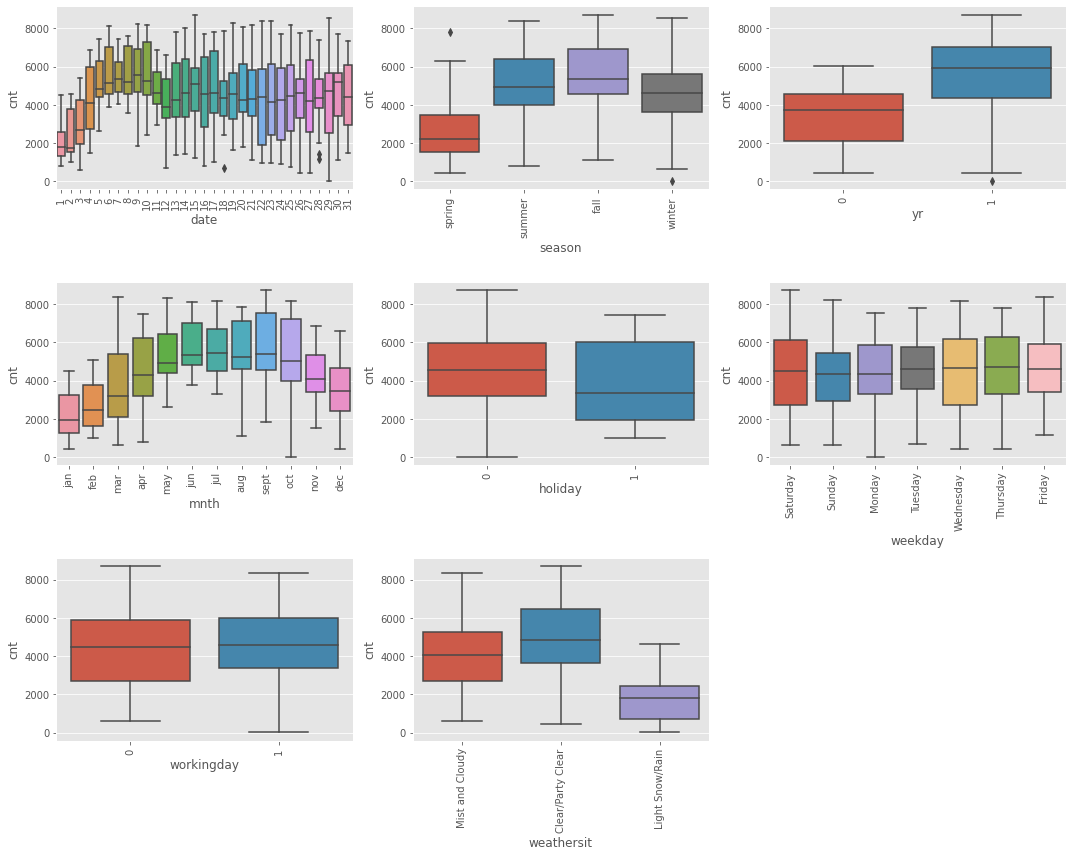

In [ ]:
# Boxplot for categorical variables to see demands

categorical_vars = ['date','season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(15, 12))
for i in enumerate(categorical_vars):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()
  
plt.show()

INFERENCE


1.   Dates between 5-8 have shown comparatively higher demand. This might be because of other underlying factors for e.g. holidays.

2.  fall has highest demand for rental bikes and spring has the lowest demand.

3.   Demand of share bikes increased a lot in 2019 from previous year.

4.   November, December, January, February months have comparative less demands than other months.September month has highest demand

5.  The lowest number of bike rents is higher on holidays than that of non-holidays

6.   Highest number of bike rent in a day is higher on Satuday, Sunday than weekday 

7.   Bike demand is very similar whether its working day or not, working day has slightly less demand

8.   The clear/partly clear weather situation has the highest demand


In [ ]:
#onehot encoding 
cat_features=['season','weekday','weathersit','mnth']

def onehot_encode(df,cols):
  for col in cols:
    dummies=pd.get_dummies(df[col],drop_first=True)
    df=pd.concat([df,dummies],axis=1)
    df.drop(col,axis=1,inplace=True)
  return df 

df=onehot_encode(df,cat_features)

In [ ]:
pd.set_option('display.max_columns', None) #to see all the columns present 
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,date,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow/Rain,Mist and Cloudy,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   casual           730 non-null    int64  
 8   registered       730 non-null    int64  
 9   cnt              730 non-null    int64  
 10  date             730 non-null    int64  
 11  spring           730 non-null    uint8  
 12  summer           730 non-null    uint8  
 13  winter           730 non-null    uint8  
 14  Monday           730 non-null    uint8  
 15  Saturday         730 non-null    uint8  
 16  Sunday           730 non-null    uint8  
 17  Thursday        

In [ ]:
numerical_vars = df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]

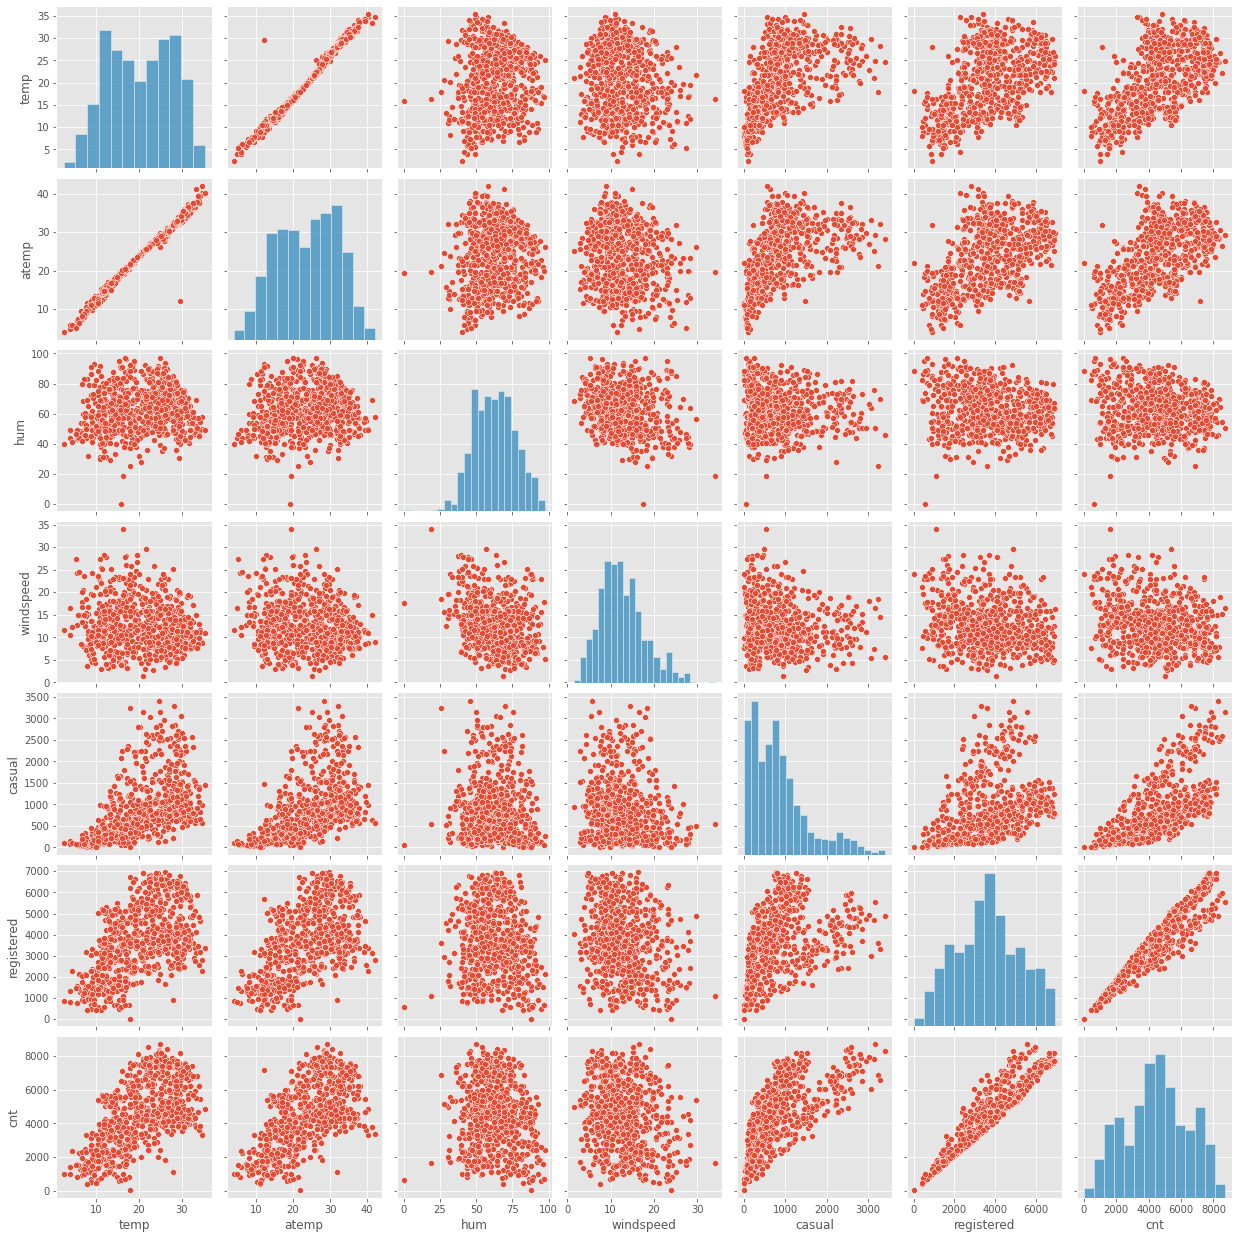

In [ ]:
#printing  a pairplot for numerical variables 
sns.pairplot(numerical_vars)

INFERENCE:


1.   Looks like the temp and atemp has the highest corelation with the target variable cnt

2.  temp and atemp are highly co-related with each other



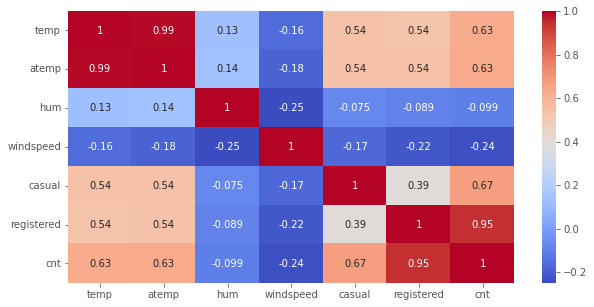

In [ ]:
plt.figure(figsize=(10,5))
corr=numerical_vars.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")

INFERENCE


1.   Here we see that temp and atemp has correlation of 0.99  which means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped altogether





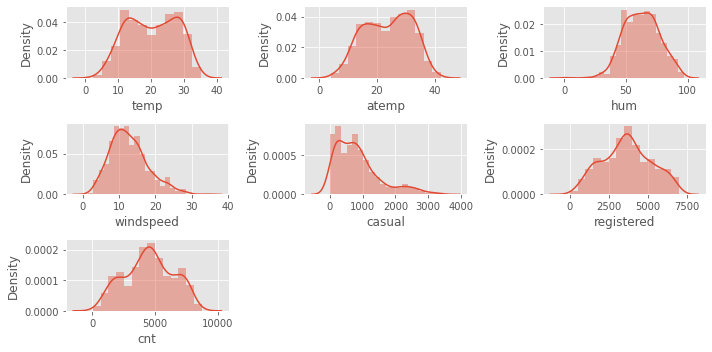

In [ ]:
numerical_vars = df[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]]
fig=plt.subplots(figsize=(10, 5))

for i, j in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.distplot(df[j])
    plt.tight_layout()


INFERENCE
1.  temp and atemp have similar distribution

2.   Humidity is most likely to be between 50-75 units

3.   Windspeed is most commonly seen between 8-12 units

4.   registered and cnt have similar distribution, as majority of the bikes are rented by registered customers



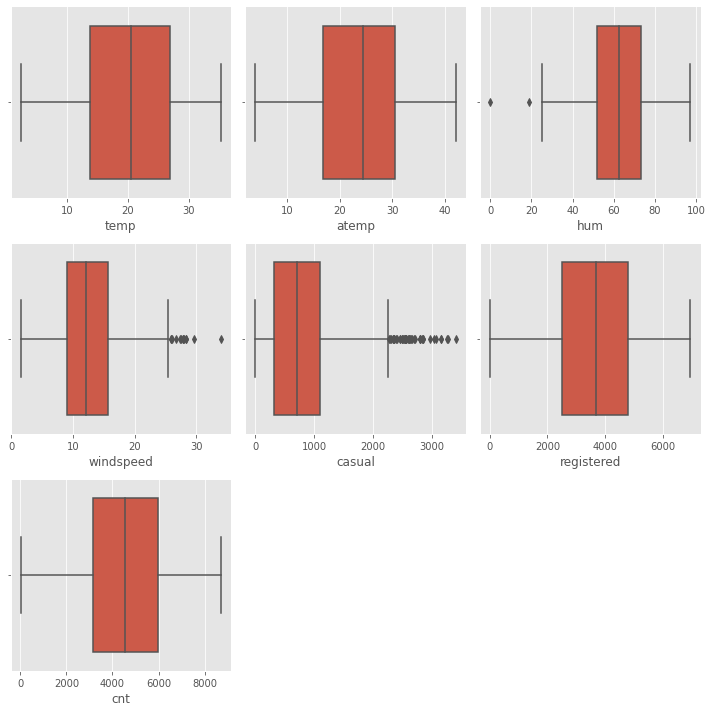

In [ ]:
fig=plt.subplots(figsize=(10, 10))

for i, j in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.boxplot(df[j])
    plt.tight_layout()

INFERENCE


1.  For 'windspeed' and 'casual', we can see some outliers




**Handling Outliers**

In [ ]:
#consider 99 percentile for both of columns( windspeed and casual)

df = df[~((df.windspeed > np.nanpercentile(df.windspeed, 99)) | (df.casual > np.nanpercentile(df['casual'], 99)))]
print(df.shape)

(714, 33)


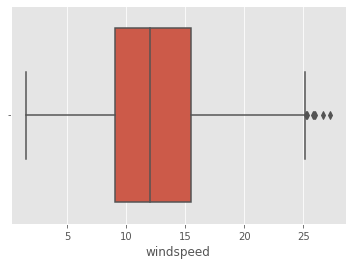

In [ ]:
sns.boxplot(df["windspeed"])

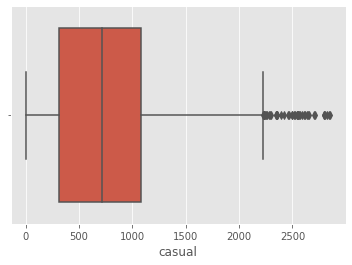

In [ ]:
sns.boxplot(df["casual"])

In [ ]:
# Since cnt = casual + register, casual and register can be thought of as redundant as "cnt" is our target variable

# atemp which has a high correlation to temp , doesnt provide much information either , hence can be dropped 

df.drop(["casual","registered","atemp"],axis=1,inplace=True)


# **Splitting the data** 

In [ ]:
X = df.drop(['cnt'], axis=1)
y = df[['cnt']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(499, 29)
(499, 1)


# **Scaling the data**

In [ ]:
#We will scale the only numeric features, excluding categorical features encoded with 0 and 1

train_numerical_vars = ['temp', 'hum', 'windspeed']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[train_numerical_vars] = scaler.fit_transform(X_train[train_numerical_vars])

X_test[train_numerical_vars] = scaler.fit_transform(X_test[train_numerical_vars])

# **Building the Model**

In [ ]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

In [ ]:
# Regressor 1 : This is the model including all features

X_train_lm = sm.add_constant(X_train)
regressor1 = sm.OLS(y_train, X_train_lm).fit()
print(regressor1.summary())
print("=======================================================================================================")
calculate_vif(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     92.19
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          2.22e-171
Time:                        16:09:57   Log-Likelihood:                -4011.3
No. Observations:                 499   AIC:                             8081.
Df Residuals:                     470   BIC:                             8203.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2563.1093    330.266     

INFRERENCE

1.  High f-statistic value confirm the linear regressor model is a significant one.

In [ ]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
def top_n_features(n):
    top_n_feat = []
    
    lm = LinearRegression()
    lm.fit(X_train_lm, y_train)
    rfe = RFE(lm, step=n)
    rfe = rfe.fit(X_train_lm, y_train)
    
    print("Top %d features selected by RFE" %n)
    ranking = list(zip(X_train_lm.columns,rfe.support_,rfe.ranking_))
    
    for i in ranking:
        if i[1]:
            top_n_feat.append(i[0])
    print(top_n_feat)
    return top_n_feat

In [ ]:
top_10_feat = top_n_features(10)

Top 10 features selected by RFE
['yr', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Light Snow/Rain', 'Mist and Cloudy', 'aug', 'jun', 'mar', 'may', 'oct', 'sept']


In [ ]:
top_12_feat = top_n_features(12)

Top 12 features selected by RFE
['yr', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Light Snow/Rain', 'Mist and Cloudy', 'aug', 'jun', 'mar', 'may', 'oct', 'sept']


In [ ]:
top_15_feat = top_n_features(15)

Top 15 features selected by RFE
['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Light Snow/Rain', 'Mist and Cloudy', 'aug', 'jun', 'mar', 'may', 'oct', 'sept']


In [ ]:
#We would check the adjusted R-squared value of the linear regressor model by taking 10, 12, 15 features respectively

In [ ]:
def build_regressor(X_train,y_train,cols):
    X_train_new = X_train[cols]
    X_train_lm = sm.add_constant(X_train_new)
    regressor = sm.OLS(y_train, X_train_lm).fit()
    print(regressor.summary())
    print("=======================================================================================================")
    calculate_vif(X_train_lm)

In [ ]:
build_regressor(X_train,y_train,top_10_feat)
print("\n\n")
build_regressor(X_train,y_train,top_12_feat)
print("\n\n")
build_regressor(X_train,y_train,top_15_feat)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     165.1
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          4.18e-179
Time:                        16:09:57   Log-Likelihood:                -4025.6
No. Observations:                 499   AIC:                             8083.
Df Residuals:                     483   BIC:                             8151.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3237.5968    353.059     

INFERENCE


1.   With top 15 features given by RFE, the model resulted in adjusted R-squared of 0.819

2.  Both top 10 and top 12 features on the other hand produced adjusted R-squared lower than that

3.   We will now manually inspect the p-values and VIF for the model built with top 15 features and try to improvise it.




In [ ]:
# Removing Sunday

top_14 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Tuesday', 'Light Snow/Rain', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_14)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     163.1
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          5.59e-173
Time:                        16:09:58   Log-Likelihood:                -4043.0
No. Observations:                 499   AIC:                             8116.
Df Residuals:                     484   BIC:                             8179.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2678.9897    354.041     

INFERENCE


1.   Removing Sunday did not impact adjusted R-sqaured

2.  We will remove 'Saturday' (Highest p-value in the latest model)




In [ ]:
#Removing Saturday

top_13 = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_13)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     174.6
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          1.96e-173
Time:                        16:09:58   Log-Likelihood:                -4044.6
No. Observations:                 499   AIC:                             8117.
Df Residuals:                     485   BIC:                             8176.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2782.3379    349.954     

INFERENCE



1.   Removing 'Sunday','Saturday' did not impact adjusted R-squared

2.   We will remove 'workingday' (Highest p-value in the latest model)
 



In [ ]:
#Removing working day 

top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']

build_regressor(X_train,y_train,top_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          1.48e-172
Time:                        16:09:58   Log-Likelihood:                -4049.4
No. Observations:                 499   AIC:                             8125.
Df Residuals:                     486   BIC:                             8180.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2973.6315    347.353     

INFERENCE


1.   Removing 'Sunday','Saturday','workingday' from top 15 features of RFE did not impact adjusted R-squared of model

2.  All the features have VIF < 7 now, which ensures there is no collinearity.

3.  All the features have p-value < 0.05 (assumed significance level), hence all the features are important.

4. Hence we would build our final model with the following features top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday', 'Light Snow/Rain','Tuesday', 'Mist and Cloudy']




# **Final Model**

In [ ]:
top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']
X_train_top12 = X_train[top_12]
regressor = LinearRegression()
regressor.fit(X_train_top12, y_train)

LinearRegression()

# **Validate Assumptions**

**Error terms are normally distributed with mean zero (not X, Y)**

In [ ]:
y_train_pred = regressor.predict(X_train_top12)

Text(0.5, 0, 'Errors')

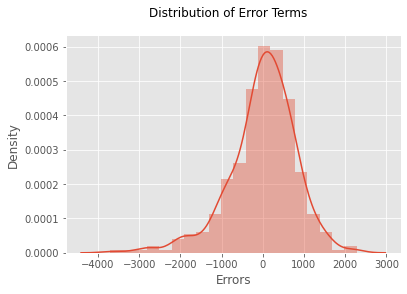

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Distribution of Error Terms')
plt.xlabel('Errors')

INFERENCE


1.   Error terms are normally distributed around 0. Hence assumption of linear regression holds true here.




**There is No Multicollinearity between the predictor variables**

In [ ]:
top_12 = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter', 'Monday',  'Light Snow/Rain','Tuesday', 'Mist and Cloudy']


build_regressor(X_train,y_train,top_12)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     185.2
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          1.48e-172
Time:                        16:15:05   Log-Likelihood:                -4049.4
No. Observations:                 499   AIC:                             8125.
Df Residuals:                     486   BIC:                             8180.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2973.6315    347.353     

INFERENCE


1.   As we see that all the Features have values that  are within permissible range of below 5, therefore there exists no collinearity




# **Making Predictions Using the Final Model**

In [ ]:
X_test_top12 = X_test[top_12]

y_test_pred = regressor.predict(X_test_top12)

**Error term has a constant variance**

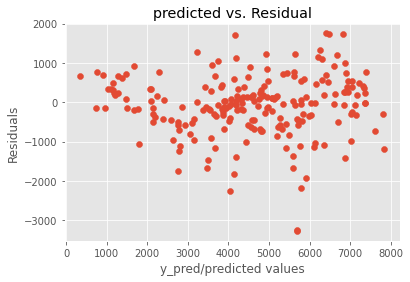

In [ ]:
plt.scatter(y_test_pred, (y_test-y_test_pred))
plt.title("predicted vs. Residual")
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.show()

INFERENCE


1.  There is no visible pattern in residual with change in y_test. Hence we can assume residual having constant variance/homoscedastic




**Observations of the error terms are uncorrelated with each other**

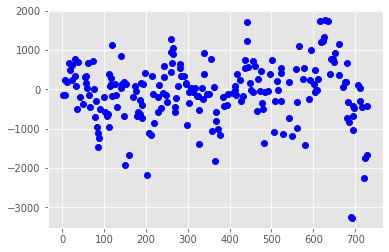

In [ ]:
plt.plot(y_test - y_test_pred, color="blue", marker='o', linewidth=2.5, linestyle="")

INFERENCE

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# **Model Evaluation**

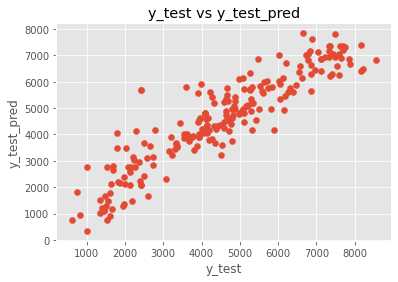

In [ ]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')      
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

MAE: 565.9010319017669
MSE: 608115.4640962306
RMSE: 779.8175838593476


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_test_pred))

0.8375561738100993


# **Model Outcome**

As per our model,the top 3 predictor variables that influence bike booking are :


1.   Temperature
2.   Light Snow/Rain
3.   Year 



*    This was decided by inspecting absolute value of their coefficient. Negative sign is coefficient means the variable is negative correlated with target varible (cnt).

*   So, these variables must be given utmost importance while planning, to achieve maximum booking  

*   The model is evaluated by R2_score and RMSE. R2_score of 0.837 means 83.7% of variance in the data is explained by the model.

*   RMSE of 780 means, the prediction made by this model can be over or underestimated by 780 units at maximum.






